In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import requests
import acquire
import prepare
import os
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

from math import sqrt
from scipy import stats

import sklearn.preprocessing
from sklearn.model_selection import train_test_split
from scipy.stats import pearsonr, spearmanr

from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans

from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.impute import SimpleImputer

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', 300)

np.random.seed(123)

In [2]:
df = acquire.get_competition_data()

In [3]:
df = prepare.prepare_competition_data(df)

In [4]:
df.head()

,skater_name,event_final_place,short_score,short_place,free_score,free_place,event_score,short_elements_score,short_elements_rank,short_components_score,short_components_rank,free_elements_score,free_elements_rank,free_components_score,free_components_rank,free_deductions,short_deductions,event_deductions,under_rotations,downgrades,edge_error,suspected_edge_error,suspected_rotation_error,combo_no_credit,illegal_element,jump_errors_all,jump_errors_costly,triple_triple,quad,triple_axel,country,oly_event_final_place,oly_short_score,oly_short_elements_score,oly_short_components_score,oly_free_elements_score,oly_free_components_score,oly_free_score,oly_event_score,season
0,Carolina Kostner,5.0,53.200000,4.0,88.593750,6.0,145.100000,27.350000,4.625000,25.975000,4.250000,38.275000,7.125000,50.443750,4.500000,0.125,0.125,0.25,0.0,0.0,0.0,0.0,0.0,0.375,0.000000,0.625000,0.625,0.250000,0.0,0.0,italy,9.0,53.77,26.25,28.52,43.84,55.89,99.73,153.50,2006
1,Elena Liashenko,4.0,53.854444,5.0,98.641111,4.0,155.226667,27.651111,4.888889,26.203333,4.333333,45.738889,5.888889,52.902222,4.222222,0.000,0.000,0.00,0.0,0.0,0.0,0.0,0.0,0.000,0.111111,0.111111,0.000,0.111111,0.0,0.0,ukraine,17.0,52.35,27.47,24.88,36.01,45.72,81.73,134.08,2006
2,Elena Sokolova,6.0,53.076250,4.0,95.217500,6.0,151.342500,26.315000,5.375000,26.886250,3.125000,42.567500,7.125000,52.775000,4.375000,0.125,0.125,0.25,0.0,0.0,0.0,0.0,0.0,0.125,0.000000,0.375000,0.375,0.000000,0.0,0.0,russia,14.0,46.69,21.13,25.56,45.38,50.28,95.66,142.35,2006
3,Emily Hughes,5.0,42.650000,6.0,83.620000,6.0,126.270000,22.130000,5.500000,22.020000,6.000000,39.800000,5.500000,45.320000,5.000000,1.500,1.500,3.00,0.0,0.0,0.0,0.0,0.0,0.500,0.000000,3.500000,3.500,0.000000,0.0,0.0,usa,7.0,57.08,31.71,25.37,53.82,50.97,103.79,160.87,2006
4,Fleur Maxwell,10.0,34.060000,11.0,68.380000,9.0,102.440000,15.100000,11.000000,18.960000,10.000000,30.620000,9.000000,37.760000,9.000000,0.000,0.000,0.00,0.0,0.0,0.0,0.0,0.0,0.000,0.000000,0.000000,0.000,0.000000,0.0,0.0,luxembourg,24.0,44.53,24.33,20.20,26.77,39.27,65.04,109.57,2006


In [5]:
train, test = train_test_split(df, test_size=.2, random_state=123)
train, validate = train_test_split(train, test_size=.3, random_state=123)

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56 entries, 9 to 16
Data columns (total 40 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   skater_name                 56 non-null     object 
 1   event_final_place           56 non-null     float64
 2   short_score                 56 non-null     float64
 3   short_place                 56 non-null     float64
 4   free_score                  56 non-null     float64
 5   free_place                  56 non-null     float64
 6   event_score                 56 non-null     float64
 7   short_elements_score        56 non-null     float64
 8   short_elements_rank         56 non-null     float64
 9   short_components_score      56 non-null     float64
 10  short_components_rank       56 non-null     float64
 11  free_elements_score         56 non-null     float64
 12  free_elements_rank          56 non-null     float64
 13  free_components_score       56 non-nu

### Distributions of features
- where it makes sense (ie. do not need distribution of skater placement as there will clearly be a place assigned to each skater based on results)

<AxesSubplot:title={'center':'Feature Correlation (contiuous variables) to event score'}>

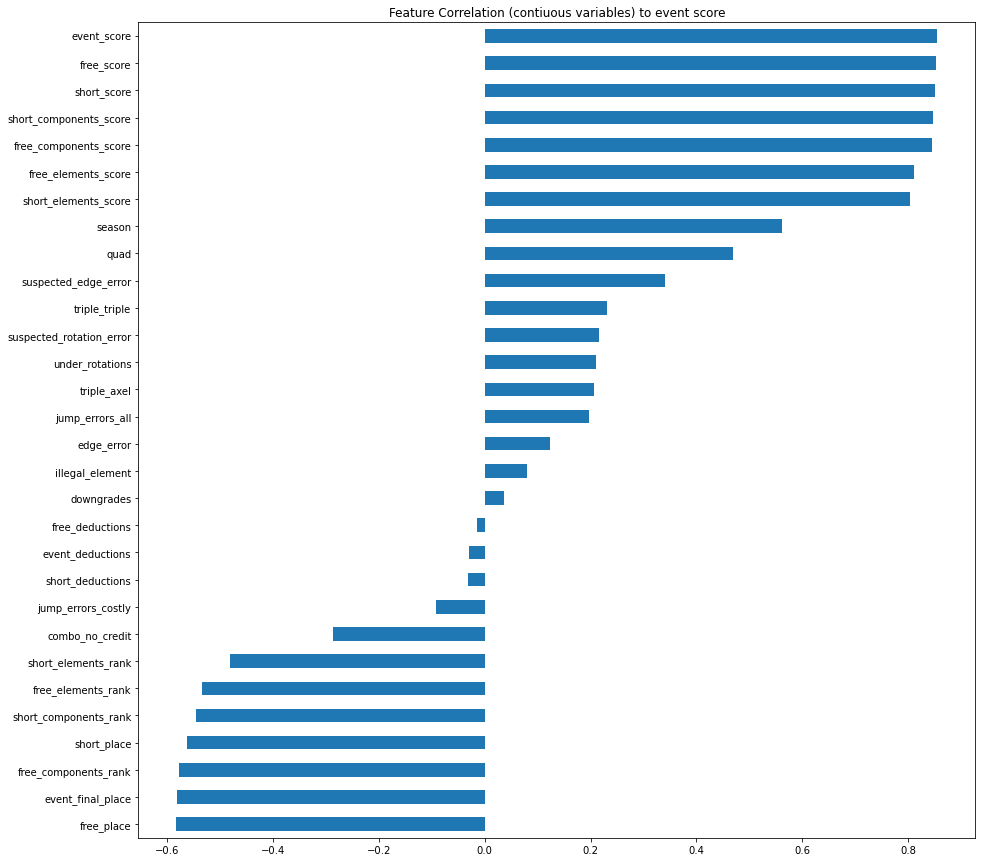

In [7]:
plt.figure(figsize=(15, 15))
# sets the size of the graph
plt.title("Feature Correlation (contiuous variables) to event score")
corr_chart = train.drop(['oly_event_final_place', 'oly_short_score', 'oly_short_elements_score', 'oly_short_components_score', 'oly_free_elements_score', 'oly_free_components_score', 'oly_free_score', 'oly_event_score'], axis=1).corrwith(train['oly_event_score']).sort_values().plot.barh()
corr_chart

##### note: columns starting with oly are directly linked to the target thus will not be included in predictive modeling, however, these variables may be useful in exploration, especially to breakdown where US skaters are exceling and lacking in the Olympics. Two train dataframes are created here for exploration purposes

In [71]:
def map_score(country):
  if country == 'usa':
    return "usa"
  elif (country == 'canada') | (country == 'russia') | (country == 'japan') | (country == 'south_korea') | (country == 'italy'):
    return 'top'
  else:
    return 'other'

train["top"] = train["country"].apply(lambda country: map_score(country))

In [73]:
def map_score(country):
  if country == 'usa':
    return "usa"
  elif (country == 'canada') | (country == 'japan') | (country == 'south_korea') | (country == 'italy'):
    return 'top_no_rus'
  elif (country == 'russia'):
    return 'russia'
  else:
    return 'other'

train["top_no_rus"] = train["country"].apply(lambda country: map_score(country))

In [79]:
def map_score(country):
  if country == 'usa':
    return "usa"
  else:
    return 'other'

train["usa"] = train["country"].apply(lambda country: map_score(country))

In [74]:
train_no_oly = train.drop(columns=['oly_event_final_place', 'oly_short_score', 'oly_short_elements_score', 'oly_short_components_score', 
                      'oly_free_elements_score', 'oly_free_components_score', 'oly_free_score'])
olympic_results = train[['country', 'top', 'skater_name', 'oly_event_final_place', 'oly_short_score', 'oly_short_elements_score', 'oly_short_components_score', 
                      'oly_free_elements_score', 'oly_free_components_score', 'oly_free_score', 'season']]

<Figure size 432x288 with 0 Axes>

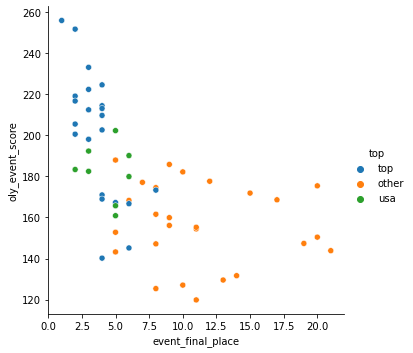

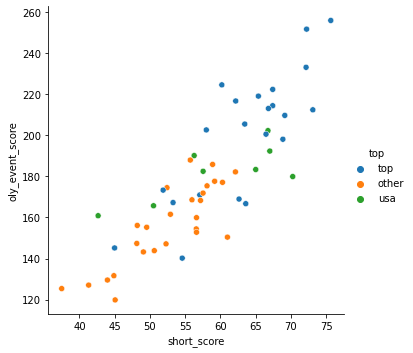

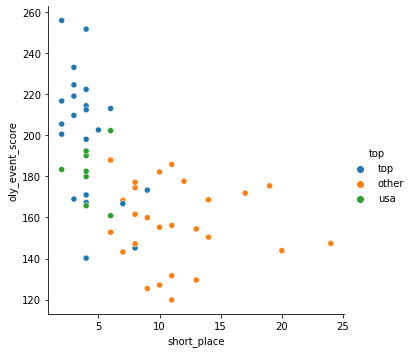

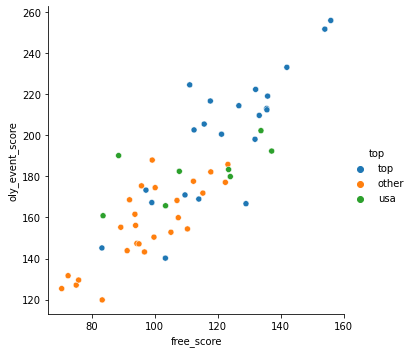

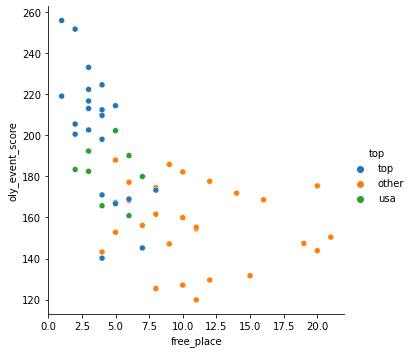

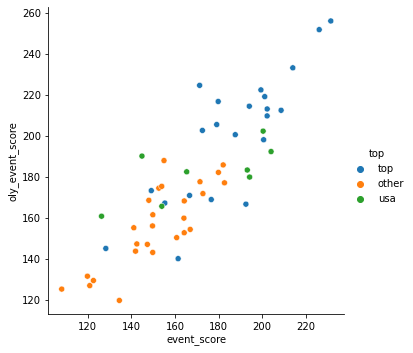

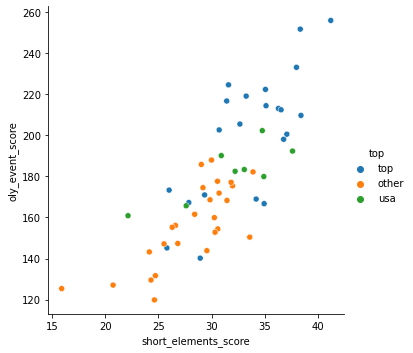

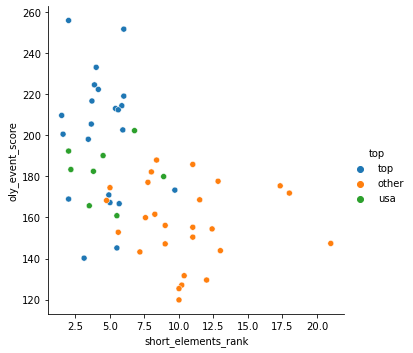

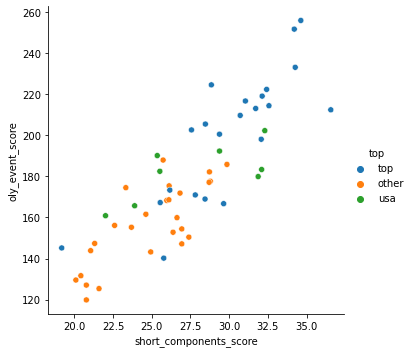

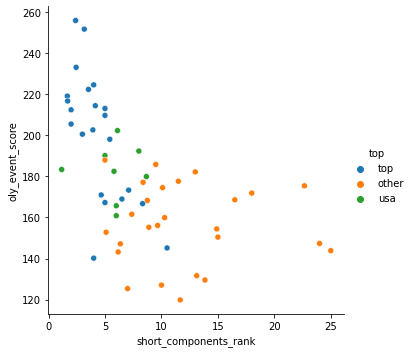

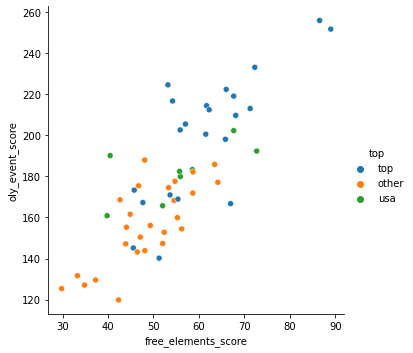

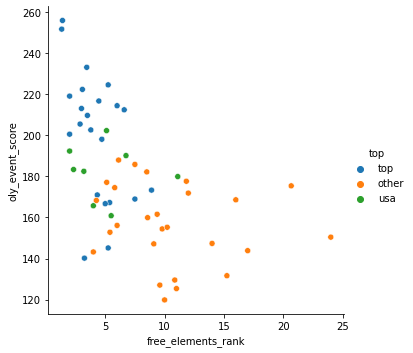

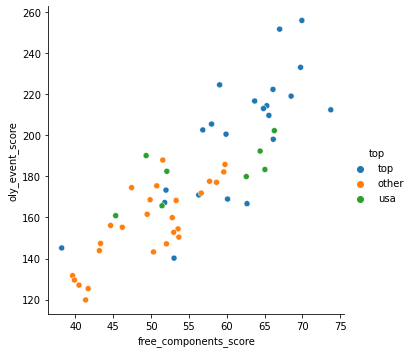

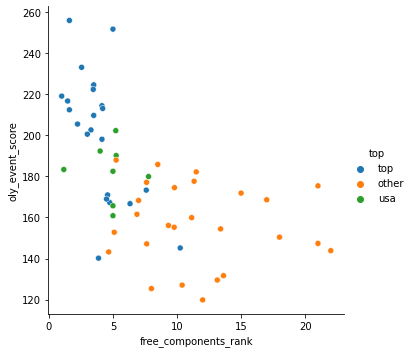

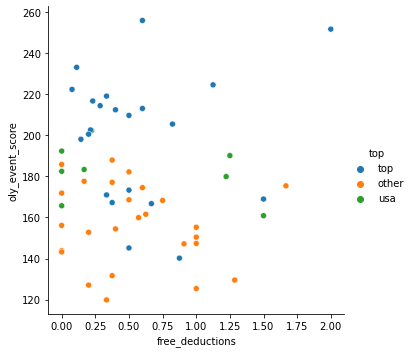

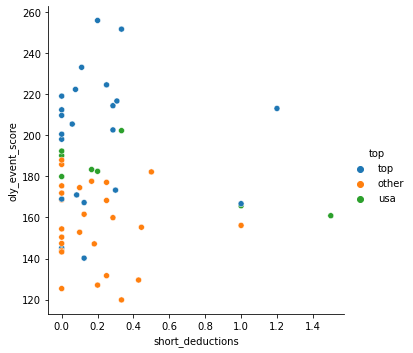

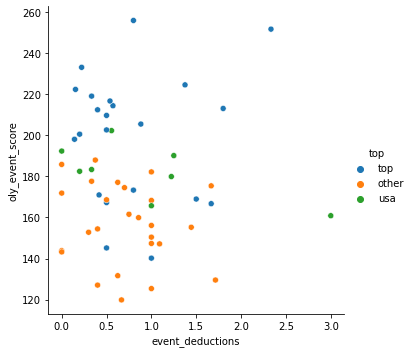

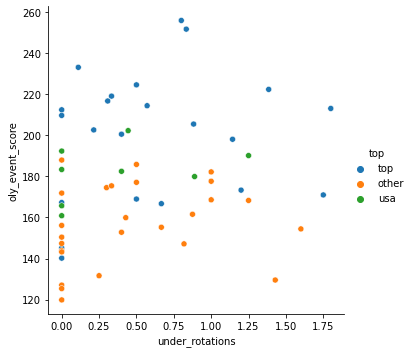

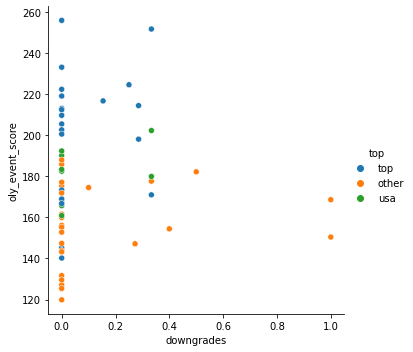

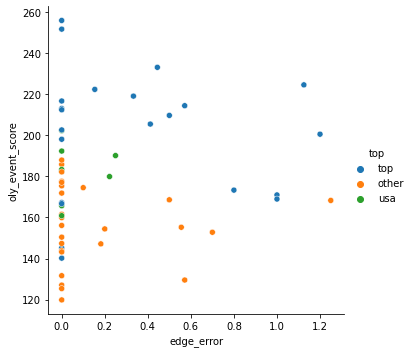

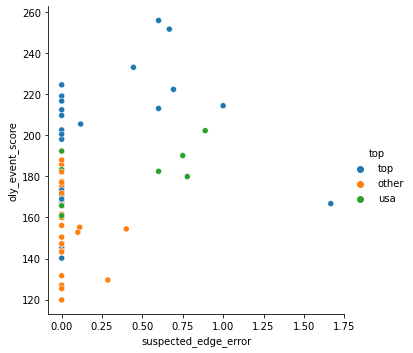

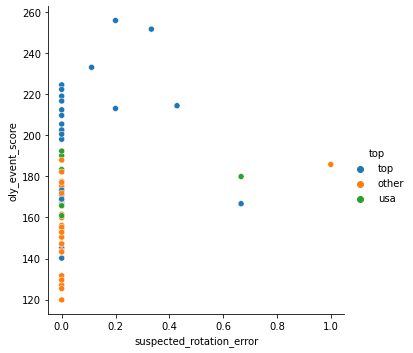

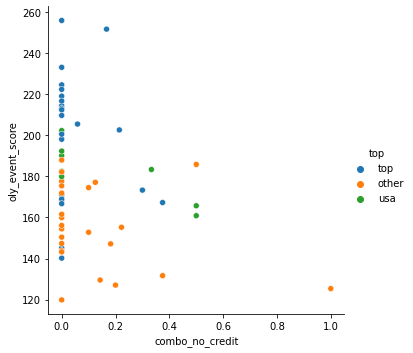

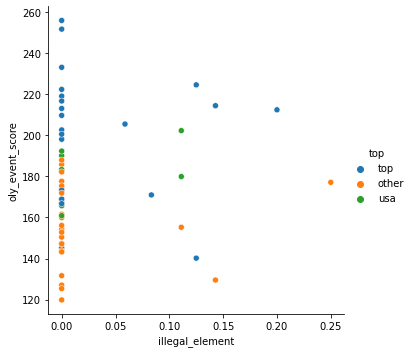

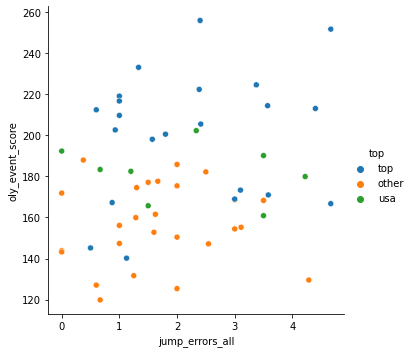

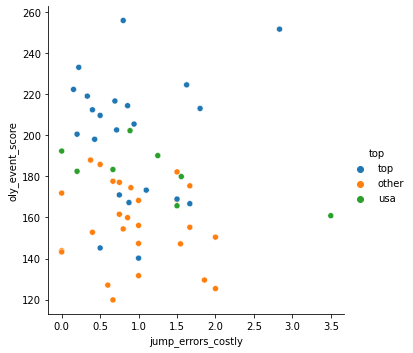

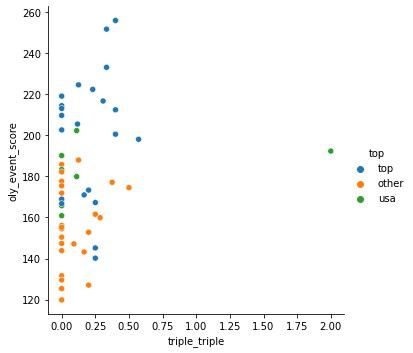

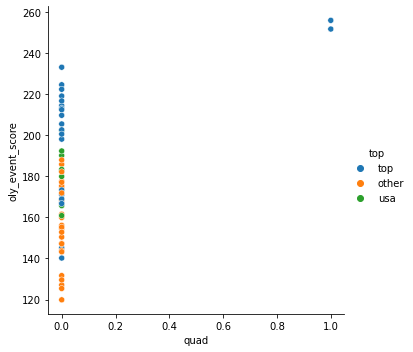

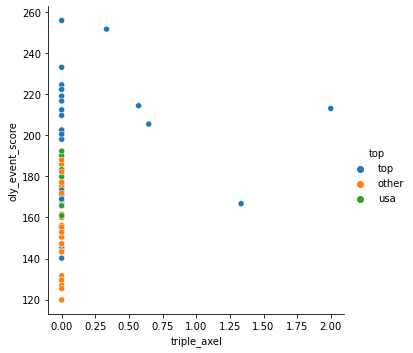

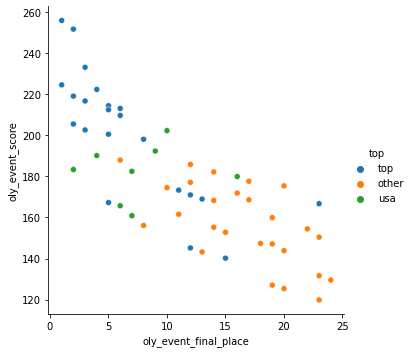

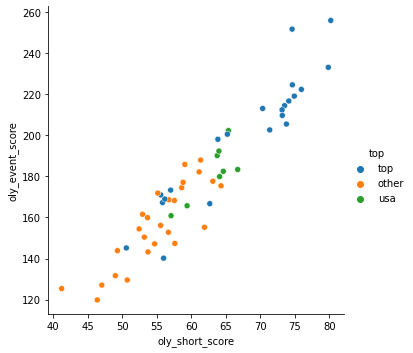

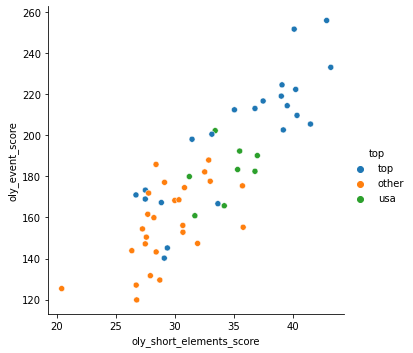

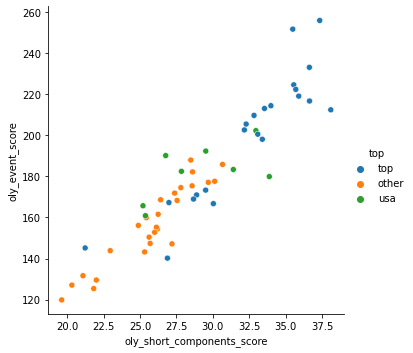

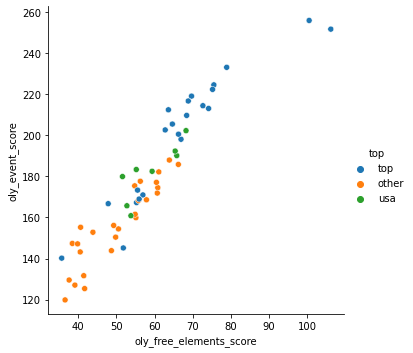

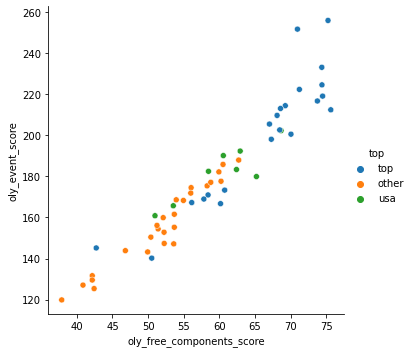

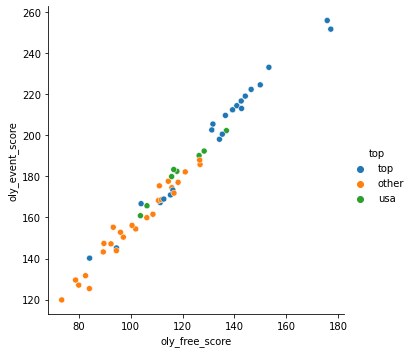

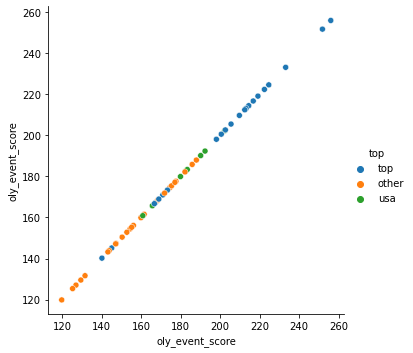

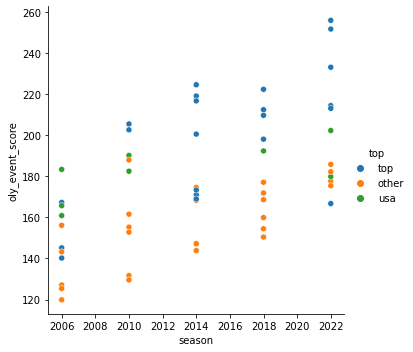

In [10]:
X1 = train.select_dtypes([np.int, np.float])
for i, col in enumerate(X1.columns):
    plt.figure(i)
    sns.relplot(x=col, y='oly_event_score', data=train, hue='top')

In [11]:
train = train.reset_index()
validate = validate.reset_index()
test = test.reset_index()

In [12]:
train = train.drop(columns=['index'])
validate = validate.drop(columns=['index'])
test = test.drop(columns=['index'])

In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 41 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   skater_name                 56 non-null     object 
 1   event_final_place           56 non-null     float64
 2   short_score                 56 non-null     float64
 3   short_place                 56 non-null     float64
 4   free_score                  56 non-null     float64
 5   free_place                  56 non-null     float64
 6   event_score                 56 non-null     float64
 7   short_elements_score        56 non-null     float64
 8   short_elements_rank         56 non-null     float64
 9   short_components_score      56 non-null     float64
 10  short_components_rank       56 non-null     float64
 11  free_elements_score         56 non-null     float64
 12  free_elements_rank          56 non-null     float64
 13  free_components_score       56 non-nu

In [14]:
train.groupby(train.season)['short_score', 'free_score', 'event_score', 'short_elements_score', 'short_components_score', 'free_elements_score', 'free_components_score'].mean()

,short_score,free_score,event_score,short_elements_score,short_components_score,free_elements_score,free_components_score
season,,,,,,,
2006,48.377864,92.354985,143.743432,25.214462,23.567947,45.234311,47.570674
2010,53.893026,96.029636,151.434498,29.055202,24.789667,46.901019,49.593352
2014,57.206887,107.868693,165.075580,30.456442,26.873182,53.595617,54.896537
2018,63.049644,119.730116,182.779760,33.757979,29.434450,59.890738,60.104852
2022,66.101224,129.141089,195.242312,34.929831,31.226869,66.233254,63.017755


In [15]:
train.where(train.top == 'usa').groupby(train.season)['short_score', 'free_score', 'event_score', 'short_elements_score', 'short_components_score', 'free_elements_score', 'free_components_score'].mean()

,short_score,free_score,event_score,short_elements_score,short_components_score,free_elements_score,free_components_score
season,,,,,,,
2006,52.725000,103.499444,157.802778,27.607222,26.006667,50.119444,53.935556
2010,56.911500,98.186750,155.098250,31.567500,25.444000,48.101750,50.710000
2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018,67.010000,137.090000,204.100000,37.630000,29.380000,72.680000,64.410000
2022,68.507222,128.843333,197.350556,34.852222,32.089444,61.771111,64.433333


In [16]:
train.where((train.top == 'top') & (train.country != 'russia')).groupby(train.season)['short_score', 'free_score', 'event_score', 'short_elements_score', 'short_components_score', 'free_elements_score', 'free_components_score'].mean()

,short_score,free_score,event_score,short_elements_score,short_components_score,free_elements_score,free_components_score
season,,,,,,,
2006,50.950833,95.249167,148.337917,27.527917,23.506250,48.162917,47.669583
2010,60.729076,114.090294,175.865084,31.695168,28.019118,56.448550,57.410063
2014,59.831987,114.857782,174.689769,30.846851,29.123341,55.324272,60.112997
2018,69.893538,133.587308,203.480846,36.685410,33.233769,65.436026,68.476923
2022,67.497810,133.268183,200.765992,36.096548,32.050468,68.037873,65.646183


In [17]:
train.where(train.top == 'other').groupby(train.season)['short_score', 'free_score', 'event_score', 'short_elements_score', 'short_components_score', 'free_elements_score', 'free_components_score'].mean()

,short_score,free_score,event_score,short_elements_score,short_components_score,free_elements_score,free_components_score
season,,,,,,,
2006,44.225800,83.931800,132.551133,22.390733,22.141733,40.546067,43.692400
2010,50.608185,89.290378,142.069719,27.337781,23.495073,43.318265,46.615565
2014,52.129891,97.567782,149.697673,28.510309,23.725945,50.372809,47.846791
2018,57.998292,107.893226,165.891518,31.143113,27.104131,53.998577,54.194720
2022,59.578750,112.279167,171.857917,31.369167,28.376250,55.901667,56.960833


Even when exluding Russia, the top performing skaters AND skaters that did not make the Olympic podium have a consistent increase across all categories where the US skaters have not(looking at mean scores). On average, US skaters are very competitive in the program components and short elements scores, but seem to lose with the free elements. One possible explanation could be endurance training. US skaters seem to be competitive in the short program both with elements and program components. This could mean that US skaters don't necessary lack technical abilities, but because the free program is longer and typically has 7 jumping elements (as opposed to 3 in the short program), endurance could possibly explain this. It would be interesting to break down the elements performed in the program and if there is a trend that may give more insight to this thoery.

In [18]:
olympic_results.groupby(olympic_results.season).mean()

,oly_event_final_place,oly_short_score,oly_short_elements_score,oly_short_components_score,oly_free_elements_score,oly_free_components_score,oly_free_score
season,,,,,,,
2006,11.818182,53.608182,29.243636,24.455455,46.536364,48.965455,94.956364
2010,10.900000,60.624000,33.828000,26.896000,53.512000,56.120000,109.332000
2014,10.666667,61.295000,31.430833,29.947500,57.710000,61.117500,118.327500
2018,12.818182,61.840000,32.094545,30.018182,61.294545,60.717273,121.557273
2022,10.750000,68.194167,35.881667,32.645833,69.880000,65.959167,135.005833


In [19]:
olympic_results.where(train.top == 'other').groupby(olympic_results.season).mean()

,oly_event_final_place,oly_short_score,oly_short_elements_score,oly_short_components_score,oly_free_elements_score,oly_free_components_score,oly_free_score,season
season,,,,,,,,
2006,5.250000,59.387500,32.2725,27.115000,53.1475,55.832500,108.730000,2006.0
2010,6.666667,63.793333,35.3400,28.786667,59.6600,59.733333,119.393333,2010.0
2014,7.000000,65.415000,32.6900,32.725000,62.7625,66.860000,129.622500,2014.0
2018,14.250000,58.317500,30.8100,27.757500,59.7325,56.950000,116.182500,2018.0
2022,10.400000,69.396000,36.2640,33.932000,74.8760,68.056000,141.932000,2022.0


In [20]:
olympic_results.where(train.top == 'usa').groupby(olympic_results.season).mean()

,oly_event_final_place,oly_short_score,oly_short_elements_score,oly_short_components_score,oly_free_elements_score,oly_free_components_score,oly_free_score,season
season,,,,,,,,
2006,18.333333,49.066667,27.316667,21.750000,38.756667,42.890000,80.980000,2006.0
2010,14.000000,59.600000,32.880000,26.720000,48.103333,54.293333,102.063333,2010.0
2014,5.000000,65.230000,33.150000,33.080000,66.280000,70.060000,135.340000,2014.0
2018,13.500000,64.580000,33.925000,30.655000,62.510000,60.815000,121.825000,2018.0
2022,17.000000,62.860000,33.763333,29.096667,57.403333,59.490000,115.560000,2022.0


In [21]:
olympic_results.where(train.top == 'top').groupby(olympic_results.season).mean()

,oly_event_final_place,oly_short_score,oly_short_elements_score,oly_short_components_score,oly_free_elements_score,oly_free_components_score,oly_free_score,season
season,,,,,,,,
2006,13.500000,51.235000,27.660000,23.825000,45.760000,46.655000,91.665000,2006.0
2010,11.750000,59.015000,33.405000,25.610000,52.957500,54.780000,107.237500,2010.0
2014,13.571429,58.378571,30.465714,27.912857,53.598571,56.558571,109.442857,2014.0
2018,11.400000,63.562000,32.390000,31.572000,62.058000,63.692000,125.750000,2018.0
2022,6.500000,70.692500,36.992500,33.700000,72.992500,68.190000,140.932500,2022.0


In [22]:
olympic_results.where((olympic_results.top == 'top') & (olympic_results.country != 'russia')).groupby(olympic_results.season).mean()

,oly_event_final_place,oly_short_score,oly_short_elements_score,oly_short_components_score,oly_free_elements_score,oly_free_components_score,oly_free_score,season
season,,,,,,,,
2006,10.666667,54.153333,29.123333,25.030000,47.603333,49.786667,96.723333,2006.0
2010,2.500000,72.570000,40.350000,32.220000,63.740000,67.760000,131.500000,2010.0
2014,8.200000,63.568000,31.654000,31.914000,61.404000,65.054000,126.258000,2014.0
2018,5.000000,74.090000,38.556667,35.533333,69.086667,71.666667,140.753333,2018.0
2022,9.250000,71.595000,38.302500,33.542500,68.400000,68.102500,135.252500,2022.0


In [ ]:
train

<AxesSubplot:xlabel='season'>

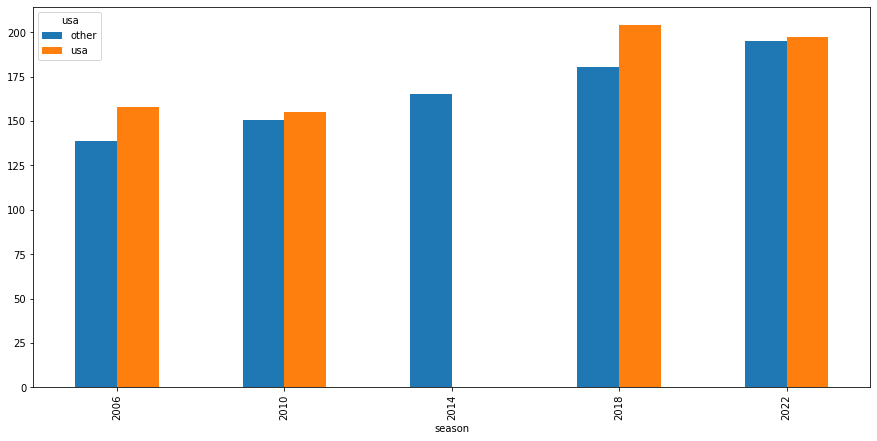

In [82]:
fig, ax = plt.subplots(figsize=(15,7))
train.groupby(['season', 'usa']).mean()['event_score'].unstack().plot(kind='bar', ax=ax)

TypeError: plot got an unexpected keyword argument 'x'

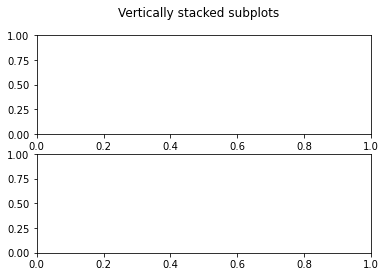

In [106]:
fig, axs = plt.subplots(2)
fig.suptitle('Vertically stacked subplots')
axs[0].plot(x = train.season, y = train.event_score)
axs[1].plot(x = train.season, y = train.short_components_score)

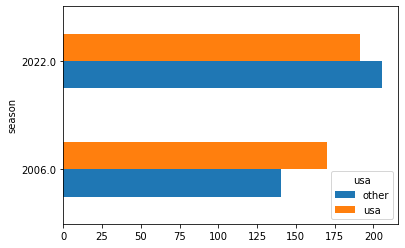

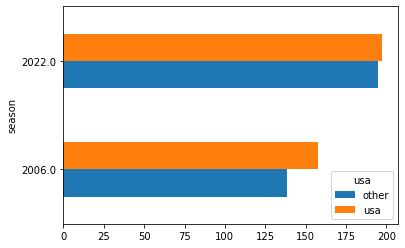

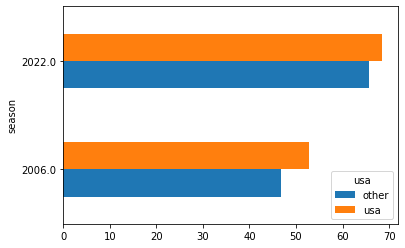

In [125]:
ax1 = (train.where((train.season == 2006) | (train.season == 2022)).groupby(['season','usa']).mean()['oly_event_score'].unstack().plot(kind='barh'))
ax2 = (train.where((train.season == 2006) | (train.season == 2022)).groupby(['season','usa']).mean()['event_score'].unstack().plot(kind='barh'))
ax2 = (train.where((train.season == 2006) | (train.season == 2022)).groupby(['season','usa']).mean()['short_score'].unstack().plot(kind='barh'))



<AxesSubplot:ylabel='season'>

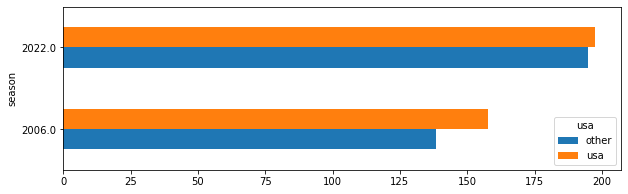

In [91]:
fig, ax = plt.subplots(figsize=(10,3))
train.where((train.season == 2006) | (train.season == 2022)).groupby(['season','usa']).mean()['event_score'].unstack().plot(kind='barh', ax=ax)

In [28]:
train_no_oly.groupby(train_no_oly.season).mean()

,event_final_place,short_score,short_place,free_score,free_place,event_score,short_elements_score,short_elements_rank,short_components_score,short_components_rank,free_elements_score,free_elements_rank,free_components_score,free_components_rank,free_deductions,short_deductions,event_deductions,under_rotations,downgrades,edge_error,suspected_edge_error,suspected_rotation_error,combo_no_credit,illegal_element,jump_errors_all,jump_errors_costly,triple_triple,quad,triple_axel,oly_event_score
season,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2006,6.363636,48.377864,6.909091,92.354985,6.181818,143.743432,25.214462,6.468939,23.567947,7.015152,45.234311,6.028030,47.570674,6.767424,0.450000,0.404545,0.854545,0.000000,0.000000,0.000000,0.000000,0.000000,0.264394,0.011364,1.130303,1.118939,0.101515,0.000000,0.000000,148.564545
2010,7.100000,53.893026,6.900000,96.029636,7.000000,151.434498,29.055202,7.347563,24.789667,7.007460,46.901019,7.384743,49.593352,6.954164,0.614853,0.189255,0.804108,0.636688,0.000000,0.248875,0.196447,0.000000,0.111319,0.031279,2.028716,0.915427,0.069265,0.000000,0.064706,169.956000
2014,7.333333,57.206887,7.750000,107.868693,7.500000,165.075580,30.456442,7.044498,26.873182,8.569940,53.595617,7.048815,54.896537,7.756770,0.623461,0.122737,0.746198,0.613267,0.092492,0.582513,0.000000,0.000000,0.048485,0.017361,2.100316,0.887175,0.149189,0.000000,0.000000,179.622500
2018,8.636364,63.049644,8.545455,119.730116,8.727273,182.779760,33.757979,7.718531,29.434450,9.729795,59.890738,8.671603,60.104852,8.988387,0.360564,0.055694,0.416259,0.550549,0.244156,0.123077,0.099301,0.000000,0.011364,0.040909,1.485614,0.671778,0.351174,0.000000,0.000000,183.397273
2022,6.833333,66.101224,7.333333,129.141089,6.833333,195.242312,34.929831,7.813095,31.226869,8.077646,66.233254,7.075000,63.017755,7.430423,0.670106,0.344180,1.014286,0.745767,0.176587,0.103175,0.553704,0.300529,0.055556,0.030423,2.980026,1.246429,0.107407,0.166667,0.353175,203.200000


In [29]:
train_no_oly.where(train_no_oly.top == 'usa').groupby(train_no_oly.season).mean()

,event_final_place,short_score,short_place,free_score,free_place,event_score,short_elements_score,short_elements_rank,short_components_score,short_components_rank,free_elements_score,free_elements_rank,free_components_score,free_components_rank,free_deductions,short_deductions,event_deductions,under_rotations,downgrades,edge_error,suspected_edge_error,suspected_rotation_error,combo_no_credit,illegal_element,jump_errors_all,jump_errors_costly,triple_triple,quad,triple_axel,oly_event_score,season
season,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2006,4.0,52.725000,4.0,103.499444,4.0,157.802778,27.607222,3.722222,26.006667,4.388889,50.119444,3.944444,53.935556,3.722222,0.555556,0.888889,1.444444,0.000000,0.000000,0.000000,0.000000,0.000000,0.444444,0.000000,1.888889,1.888889,0.000000,0.0,0.0,169.980,2006.0
2010,4.5,56.911500,4.0,98.186750,4.5,155.098250,31.567500,4.150000,25.444000,5.400000,48.101750,4.975000,50.710000,5.125000,0.625000,0.100000,0.725000,0.825000,0.000000,0.125000,0.675000,0.000000,0.000000,0.000000,2.350000,0.725000,0.000000,0.0,0.0,186.320,2010.0
2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018,3.0,67.010000,4.0,137.090000,3.0,204.100000,37.630000,2.000000,29.380000,8.000000,72.680000,2.000000,64.410000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.0,0.0,192.350,2018.0
2022,5.5,68.507222,5.0,128.843333,6.0,197.350556,34.852222,7.833333,32.089444,7.388889,61.771111,8.111111,64.433333,6.500000,0.722222,0.166667,0.888889,0.666667,0.333333,0.111111,0.833333,0.333333,0.000000,0.111111,3.277778,1.222222,0.111111,0.0,0.0,191.115,2022.0


In [30]:
train_no_oly.where(train_no_oly.top == 'other').groupby(train_no_oly.season).mean()

,event_final_place,short_score,short_place,free_score,free_place,event_score,short_elements_score,short_elements_rank,short_components_score,short_components_rank,free_elements_score,free_elements_rank,free_components_score,free_components_rank,free_deductions,short_deductions,event_deductions,under_rotations,downgrades,edge_error,suspected_edge_error,suspected_rotation_error,combo_no_credit,illegal_element,jump_errors_all,jump_errors_costly,triple_triple,quad,triple_axel,oly_event_score,season
season,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2006,8.600000,44.225800,9.6,83.931800,8.000000,132.551133,22.390733,9.273333,22.141733,8.900000,40.546067,8.120000,43.692400,8.880000,0.306667,0.306667,0.613333,0.000000,0.000000,0.000000,0.000000,0.00,0.240000,0.000000,0.853333,0.853333,0.073333,0.0,0.0,134.328000,2006.0
2010,9.333333,50.608185,9.0,89.290378,9.333333,142.069719,27.337781,9.266667,23.495073,8.891005,43.318265,9.538228,46.615565,8.961772,0.643452,0.224669,0.868122,0.603373,0.000000,0.304497,0.082804,0.00,0.140013,0.042328,2.041138,1.008135,0.095833,0.0,0.0,153.130000,2010.0
2014,12.400000,52.129891,13.4,97.567782,12.400000,149.697673,28.510309,10.550000,23.725945,14.842727,50.372809,10.028182,47.846791,13.487273,0.651818,0.106364,0.758182,0.473636,0.074545,0.306364,0.000000,0.00,0.056364,0.000000,1.669091,0.889091,0.118182,0.0,0.0,156.236000,2014.0
2018,13.166667,57.998292,12.5,107.893226,13.000000,165.891518,31.143113,11.370238,27.104131,13.843452,53.998577,12.582738,54.194720,13.694643,0.474405,0.089286,0.563690,0.588095,0.400000,0.116667,0.066667,0.00,0.020833,0.041667,1.797619,0.984524,0.110119,0.0,0.0,163.731667,2018.0
2022,12.750000,59.578750,13.0,112.279167,12.750000,171.857917,31.369167,12.291667,28.376250,14.166667,55.901667,12.125000,56.960833,13.083333,0.583333,0.166667,0.750000,0.708333,0.208333,0.000000,0.000000,0.25,0.125000,0.000000,2.041667,1.083333,0.000000,0.0,0.0,180.275000,2022.0


In [31]:
train_no_oly.where(train.top == 'top').groupby(train_no_oly.season).mean()

,event_final_place,short_score,short_place,free_score,free_place,event_score,short_elements_score,short_elements_rank,short_components_score,short_components_rank,free_elements_score,free_elements_rank,free_components_score,free_components_rank,free_deductions,short_deductions,event_deductions,under_rotations,downgrades,edge_error,suspected_edge_error,suspected_rotation_error,combo_no_credit,illegal_element,jump_errors_all,jump_errors_costly,triple_triple,quad,triple_axel,oly_event_score,season
season,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2006,5.000000,50.950833,5.333333,95.249167,5.333333,148.337917,27.527917,4.541667,23.506250,6.500000,48.162917,4.625000,47.669583,6.291667,0.583333,0.083333,0.666667,0.000000,0.000000,0.000000,0.000000,0.00000,0.125000,0.041667,0.833333,0.791667,0.250000,0.000000,0.000000,150.876667,2006.0
2010,3.000000,60.729076,3.500000,114.090294,2.500000,175.865084,31.695168,4.787815,28.019118,2.964286,56.448550,3.334034,57.410063,2.760504,0.518908,0.172269,0.691176,0.548319,0.000000,0.205882,0.058824,0.00000,0.136555,0.029412,1.670168,0.827731,0.058824,0.000000,0.323529,204.070000,2010.0
2014,3.714286,60.833312,3.714286,115.226487,4.000000,176.059799,31.846537,4.540568,29.121208,4.089377,55.897623,4.920696,59.932070,3.663553,0.603205,0.134432,0.737637,0.713004,0.105311,0.779762,0.000000,0.00000,0.042857,0.029762,2.408333,0.885806,0.171337,0.000000,0.000000,196.327143,2014.0
2018,3.250000,69.636582,3.750000,133.145481,3.750000,202.782063,36.712272,3.670604,32.943541,3.991758,65.531662,4.472802,67.893764,3.176099,0.279945,0.019231,0.299176,0.631868,0.071429,0.163462,0.173077,0.00000,0.000000,0.050000,1.389011,0.370604,0.300549,0.000000,0.000000,210.657500,2018.0
2022,3.333333,69.647540,4.333333,140.481622,3.166667,210.129161,37.329476,4.820635,32.839757,4.247884,74.608360,3.362963,66.583844,3.971958,0.710582,0.521693,1.232275,0.797090,0.103175,0.169312,0.829630,0.32328,0.027778,0.023810,3.506349,1.363228,0.177778,0.333333,0.706349,222.511667,2022.0


In [ ]:
train.info()

In [ ]:
train.downgrades

In [ ]:
X_train = train.drop(columns=['index', 'skater_name','oly_event_final_place', 'oly_short_score', 'oly_short_elements_score',
                             'oly_short_components_score', 'oly_free_elements_score', 'oly_free_components_score',
                             'oly_free_score', 'oly_event_score', 'top', 'country'])
# creates dataframe that drops all column except the selected features for modeling
y_train = train[['oly_event_score']]
# creates dataframe of target variable (y) only

X_validate = validate.drop(columns=['index','skater_name','oly_event_final_place', 'oly_short_score', 'oly_short_elements_score',
                             'oly_short_components_score', 'oly_free_elements_score', 'oly_free_components_score',
                             'oly_free_score', 'oly_event_score','country'])
y_validate = validate[['oly_event_score']]
# repeat above for validate set

X_test = test.drop(columns=['index', 'skater_name','oly_event_final_place', 'oly_short_score', 'oly_short_elements_score',
                             'oly_short_components_score', 'oly_free_elements_score', 'oly_free_components_score',
                             'oly_free_score', 'oly_event_score', 'country'])
y_test = test[['oly_event_score']]

In [ ]:
scaler = sklearn.preprocessing.StandardScaler()
# employs the min max scaler
scaler.fit(X_train)
# inserts the 4 selected features into the scaler

X_train = data=scaler.transform(X_train)
X_validate = data=scaler.transform(X_validate)
X_test = data=scaler.transform(X_test)

In [ ]:
X_train = pd.DataFrame(X_train)
X_validate = pd.DataFrame(X_validate)
X_test = pd.DataFrame(X_test)

In [ ]:
X_train

In [ ]:
train.oly_event_score.mean()

In [ ]:
y_train['pred_mean'] = y_train.oly_event_score.mean()
y_validate['pred_mean'] = y_validate.oly_event_score.mean()
# calculates mean prior to computing rmse

rmse_train = mean_squared_error(y_train.oly_event_score, y_train.pred_mean)**(1/2)
rmse_validate = mean_squared_error(y_validate.oly_event_score, y_validate.pred_mean)**(1/2)
# computes baseline RMSE for train and validate sets (square root of MSE)

print("Baseline RMSE\nTrain/In-Sample: ", round(rmse_train, 2)), 
print("Baseline RMSE\nValidate/Out-of-Sample: ", round(rmse_validate, 2))

In [ ]:
lm = LinearRegression(normalize=True)
# create the model

lm.fit(X_train, y_train.oly_event_score)
# fit the model to scaled training data

y_train['value_predict_lm'] = lm.predict(X_train)
# computes model predictions
rmse_train = mean_squared_error(y_train.oly_event_score, y_train.value_predict_lm)**(1/2)
# computes model rmse

y_validate['value_predict_lm'] = lm.predict(X_validate)
rmse_validate = mean_squared_error(y_validate.oly_event_score, y_validate.value_predict_lm)**(1/2)
# comutes predictions and rmse with validate data

print("**OLS Linear Regression Performance**")
print("---------------------------------------")
print("RMSE for OLS using LinearRegression\nTraining/In-Sample: ", round(rmse_train, 2))
print("---------------------------------------")
print("RMSE for OLS using LinearRegression\nValidation/Out-of-Sample: ", round(rmse_validate, 2))

In [ ]:
lars = LassoLars(alpha=1)
# creates the model

lars.fit(X_train, y_train.oly_event_score)
# fit the model to scaled training data

y_train['pred_lars'] = lars.predict(X_train)
# computes model predictions
rmse_train = mean_squared_error(y_train.oly_event_score, y_train.pred_lars)**(1/2)
# computes model rmse

y_validate['pred_lars'] = lars.predict(X_validate)
rmse_validate = mean_squared_error(y_validate.oly_event_score, y_validate.pred_lars)**(1/2)
# comutes predictions and rmse with validate data

print("**LARS Performance**")
print("---------------------------------------")
print("RMSE for Lars\nTraining/In-Sample: ", round(rmse_train, 2))
print("---------------------------------------")
print("RMSE for Lars\nOut-of-Sample: ", round(rmse_validate, 2))

In [ ]:
glm = TweedieRegressor(power= 2, alpha=3)
# creates the model

glm.fit(X_train, y_train.oly_event_score)
# fit the model to scaled training data

y_train['pred_value_glm'] = glm.predict(X_train)
# computes model predictions
rmse_train = mean_squared_error(y_train.oly_event_score, y_train.pred_value_glm)**(1/2)
# computes model rmse

y_validate['pred_value_glm'] = glm.predict(X_validate)
rmse_validate = mean_squared_error(y_validate.oly_event_score, y_validate.pred_value_glm)**(1/2)
# comutes predictions and rmse with validate data

print("**Generalized Linear Model Performance**")
print("---------------------------------------")
print("RMSE for GLM /In-Sample: ", round(rmse_train, 2)), 
print("---------------------------------------")
print("RMSE for GLM \nValidation/Out-of-Sample: ", round(rmse_validate, 2))

In [ ]:
pf = PolynomialFeatures(degree=2)
# creates polynomial features to use in model with degree of 3

X_train_degree3 = pf.fit_transform(X_train)
# fit and transform X_train_scaled

X_validate_degree3 = pf.transform(X_validate)


In [ ]:
lm3 = LinearRegression(normalize=True)
# creates linear regression model prior to fitting with new polynomial features

lm3.fit(X_train_degree3, y_train.oly_event_score)
# fit and transform polynomial features and target

y_train['value_pred_lm3'] = lm3.predict(X_train_degree3)
# predictions calculated on train

rmse_train = mean_squared_error(y_train.oly_event_score, y_train.value_pred_lm3)**(1/2)
# computes rmse with train

y_validate['value_pred_lm3'] = lm3.predict(X_validate_degree3)
rmse_validate = mean_squared_error(y_validate.oly_event_score, y_validate.value_pred_lm3)**(1/2)
# computes predictions/rmse with validate

print("**Polynomial Regression Model Performance**")
print("---------------------------------------")
print("RMSE for Polynomial Model \nTraining/In-Sample: ", round(rmse_train, 2)),
print("---------------------------------------")
print("RMSE for Polynomial Model, \nValidation/Out-of-Sample: ", round(rmse_validate, 2))

In [ ]:
y_test['pred_value_glm'] = glm.predict(X_test)
rmse_test = mean_squared_error(y_test.oly_event_score, y_test.pred_value_glm)**(1/2)

print("**Generalized Linear Model Performance on Test Data**")
print("---------------------------------------")
print("RMSE : Test Data \nTesting/Out-of-Sample: ", round(rmse_test, 2))

In [ ]:
### distributions of features

# sns.kdeplot(train.free_score_mean[train.top == "top"],label='top');
# sns.kdeplot(train.free_score_mean[train.top == "usa"],label='usa');
# sns.kdeplot(train.free_score_mean[train.top == "other"],label='other');
